# Introduction
The dataset contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe diﬀerent attributes about the person including whether they survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X).

# Objective
Question that can analysed from this data set : 
1. What is the dimension (col, row) of the data frame? 
2. How to know data type of each variable? 
3. How many passengers survived (Survived=1) and not-survived (Survived=0)? 
4. How to drop column ‘Name’ from the data frame? 
5. Add one new column called ‘family’ to represent number of family-member aboard (hint: family = sibsp + parch) 
6. As shown, columns ‘Age’ contains missing values. Please add new column named ‘Age_miss’ to indicate whether Age is missing or not (Age_miss = ‘YES’ for missing value and ‘NO’ for nonmissing value).  
7. Please ﬁll Age missing value with means of existing Age values 
8. What is the maximum passenger Age who survived from the tragedy?  
9. How many passengers survived from each ‘PClass’?  
10. How to randomly split the data frame into 2 parts (titanic1 and titanic2) with proportion of 0.7 for tttanic1 and 0.3 for titanic2 ?

# Part I - Answer the Question

#### Data Preparation

In [1]:
# Import libraries
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split

In [2]:
# load the data
dataset = pd.read_csv('titanic.csv')
dataset.head(15)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


### Question 1. What is the dimension (col, row) of the data frame?

In [3]:
#looking for dimension of data
dataset.shape

(887, 8)

Data yang kita miliki mempunyai dimensi 887 baris dan 8 kolom

### Qustion 2. How to know data type of each variable?

In [5]:
# looking for data type of each variable (column)
dataset.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Dengan menggunakan dtypes kita bisa melihat tipe dari masing-masing variable. Terdapat variable Name dan Sex yang berupa object, dan lainnya berupa integer dan float. 

### Question 3. How many passengers survived (Survived=1) and not-survived (Survived=0)?

In [6]:
a=dataset['Survived'].value_counts()
print ('Number of passengers survived %d' % a[1])
print ('Number of passengers not survived %d' % a[0])

Number of passengers survived 342
Number of passengers not survived 545


Dari info diatas, penumpang yang selamat ada sebanyak 342 orang dan penumpang yang tidak selamat ada 545 orang. 

### Question 4. How to drop column ‘Name’ from the data frame?

In [3]:
#using function 'drop' to drop a column from dataset
dataset.drop(['Name'], axis=1).head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### Question 5. Add one new column called ‘family’ to represent number of family-member aboard (hint: family = sibsp + parch) 

In [9]:
dataset['family']=dataset['Siblings/Spouses Aboard']+dataset['Parents/Children Aboard']
dataset.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,family
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,4
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333,2
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708,1


### Question 6. As shown, columns ‘Age’ contains missing values. Please add new column named ‘Age_miss’ to indicate whether Age is missing or not (Age_miss = ‘YES’ for missing value and ‘NO’ for nonmissing value).

In [13]:
#checking for missing values in column 'Age'
dataset['Age'].isnull().value_counts()

False    887
Name: Age, dtype: int64

From that result, there is no missing value in column 'Age'

In [15]:
# How to add new column to indicate whether Age is missing or not ?
# New column named 'Age_miss',
# if age is missing, 'Age_miss' = 'YES'. But if age is not missing, 'Age_miss' = 'NO'. 

dataset['Age_miss']=np.where(dataset['Age'].notnull(), 'NO', 'YES')
dataset.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,family,Age_miss
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,NO
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,NO
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,NO
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,NO
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,NO
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0,NO
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0,NO
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,4,NO
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333,2,NO
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708,1,NO


### Question 7. Please ﬁll Age missing value with means of existing Age values

In [17]:
# Let there is missing values in 'Age', we can filling with the means of existing Age values
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,family,Age_miss
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,NO
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,NO
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,NO
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,NO
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,NO


### Question 8. What is the maximum passenger Age who survived from the tragedy?

In [19]:
# To find the maximum passenger Age who survived from the tragedy, we need to filtering column 'Survived'. 
# Filter passanger who survived with >> dataset['Survived']==1
# Then, get the maximum his/her age

maxage_passenger=dataset['Age'][dataset['Survived']==1].max()
print ('Maximum passenger Age who survived is %d' % maxage_passenger)

Maximum passenger Age who survived is 80


Didapatkan dari informasi diatas, bahwa umur penumpang tertua yang selamat adalah 80 tahun. 

### Question 9. How many passengers survived from each ‘PClass’? 

In [51]:
b=dataset[dataset['Survived']==1].groupby('Pclass')['Survived'].count()
print ('Number of passengers survived in PClass 1 is %d, in PClass 2 is %d, and in PClass 3 is %d.' % (b[1],b[2],b[3]))

Number of passengers survived in PClass 1 is 136, in PClass 2 is 87, and in PClass 3 is 119.


In [52]:
#Print all the number of passengers survived from each ‘PClass’
b

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Masing-masing PClass memiliki jumlah penumpang selamat yang berbeda-beda. Dapat dilihat bahwa penumpang selamat paling banyak dari PClass1.

### Question 10. How to randomly split the data frame into 2 parts (titanic1 and titanic2) with proportion of 0.7 for tttanic1 and 0.3 for titanic2 ?

In [54]:
titanic1, titanic2 = train_test_split(dataset, test_size = 0.3, random_state = 0)

In [56]:
#looking for shape of titanic1
titanic1.shape

(620, 10)

In [57]:
#looking for shape of titanic2
titanic2.shape

(267, 10)

Setelah kita bagi data menjadi 70 : 30 bagian, python secara acak akan membagi data yang kita miliki secara acak. 
Dapat dilihat bahwa titanic1 memiliki 620 baris, sedangkan titanic 2 memiliki 267 data.

# Part II - More we Explore, More we Get the Insights

Pertama-tama, saya ingin membagi data berdasarkan Classnya


In [4]:
dataset1=dataset[dataset.Pclass==1]
dataset2=dataset[dataset.Pclass==2]
dataset3=dataset[dataset.Pclass==3]

Text(0.5,1,'Fare Survived PClass 3')

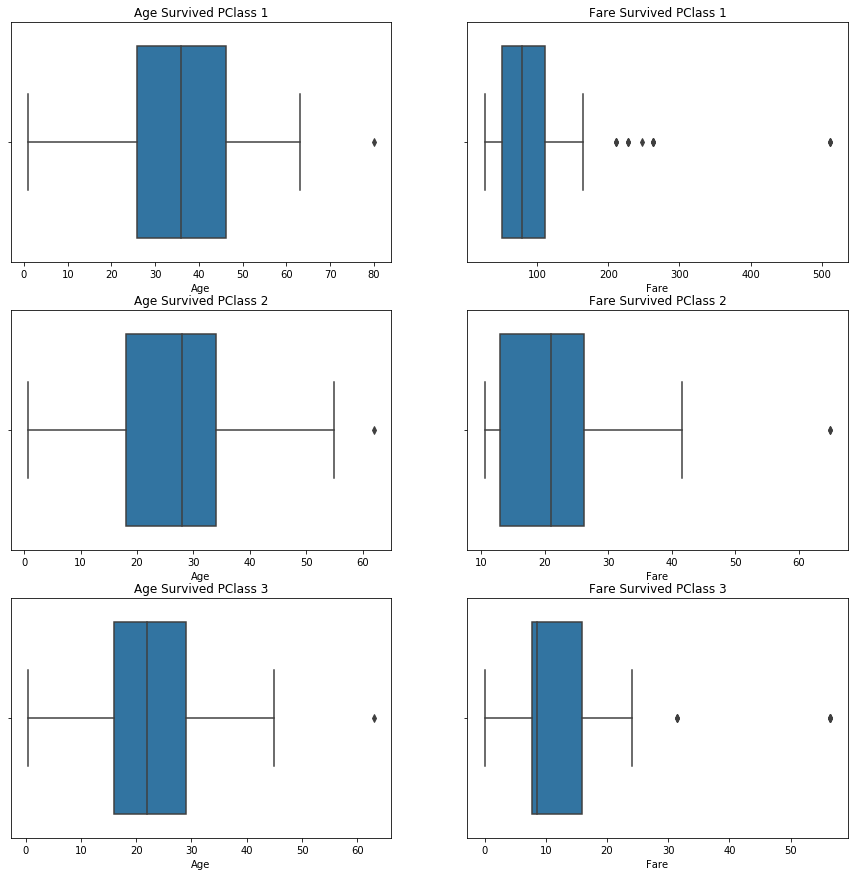

In [29]:
cont1=dataset1[(dataset1.Survived==1)]
cont2=dataset2[(dataset2.Survived==1)]
cont3=dataset3[(dataset3.Survived==1)]

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x=cont1.Age)
plt.title('Age Survived PClass 1')

plt.subplot(3,2,2)
sns.boxplot(x=cont1.Fare)
plt.title('Fare Survived PClass 1')

plt.subplot(3,2,3)
sns.boxplot(x=cont2.Age)
plt.title('Age Survived PClass 2')

plt.subplot(3,2,4)
sns.boxplot(x=cont2.Fare)
plt.title('Fare Survived PClass 2')

plt.subplot(3,2,5)
sns.boxplot(x=cont3.Age)
plt.title('Age Survived PClass 3')

plt.subplot(3,2,6)
sns.boxplot(x=cont3.Fare)
plt.title('Fare Survived PClass 3')


**Insights** yang didapat dari analisis (Part II) diatas adalah :
1. Sebaran usia dan harga karcis penumpang selamat untuk kelas 1,2,3 digambarkan pada boxplot
2. Didapatkan dari boxplot tersebut bahwa Penumpang selamat untuk kelas 1 bisa dikategorikan dewasa (pada umumnya, umur mereka berada di rentang 25-50). 
3. Berbeda dengan kelas 1, penumpang selamat pada kelas 2 dan 3 bisa dikategorikan sebagai penumpang di usia remaja - dewasa. 
4. Harga tiket kelas 1 jauh lebih tinggi dibandingkan dengan kelas 2, apalagi jika dibandingkan dengan kelas 3. 
5. Pada data yang dimiliki, masih terdapat outlier dari harga yang dibayarkan.
6. Age, PClasss, dan Fare tidak menentukan apakah seseorang selamat atau tidak. Karena penumpang selamat juga berasal dari PClass dengan harga rendah. 